In [1]:
import sys
import os

# get the current working directory
notebook_dir = os.getcwd()

# make sure the src directory is in the python path
src_path = os.path.join(notebook_dir, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

import numpy as np
import src.create_grids as cg
import src.eigenmode.solve_eigenv as solve_eigenv
import src.eigenmode.gen_M as gen_M
import src.eigenmode.speed_analysis as speed_analysis
import src.eigenmode.spectrum as spectrum

# Part I: 3.1 eigenmode

## A) Formulate a matrix version of the eigenvalue problem

Answer and derivation is put on the report "Method" Section, while the discretization points and their positions are draw below:

In [ ]:
cg.draw_the_position_and_points(5, "./fig/grid.png")

## B) Solve the eigenvalue problem of three shapes 

We solve the eigenvalue problem by eigs(), as the matrix is sparse and we are required only to find the first few smallest eigenvalues

In [ ]:

N = 50  # Grid size for the circle
L = 1
h = L/N  # Grid spacing

# Square domain
M_rectangle = gen_M.generate_M_with_square(N, h)  # Generate M matrix
solve_eigenv.plot_eigenmodes(M_rectangle, N, N, num_modes=4, path="./fig/square.png")  # Plot the first three eig

# Rectangular domain
M_rectangle = gen_M.generate_M_with_rectangle(N, h)  # Generate M for the rectangular domain
solve_eigenv.plot_eigenmodes(M_rectangle, 2*N, N, num_modes=4, path="./fig/rectangular.png")  # Plot the first three eigenvector heatmaps

# Circular domain
M_circle_v1, index_map, valid_points = gen_M.generate_M_with_circle_v1(N, h) 
solve_eigenv.solve_eigenproblem_circle_v1(M_circle_v1, index_map, N, num_modes=4, path="./fig/circle_v1.png")

M_circle_v2, mask= gen_M.generate_M_with_circle_v2(N, h)
solve_eigenv.solve_eigenproblem_circle_v2(M_circle_v2, mask, N, num_modes=4, path="./fig/circle_v2.png")


## C) Comparison with different matrices solver

Running benchmark...
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.sparse.linalg.eigs() (for sparse matrices, computing 6 smallest eigenvalues)
Using scipy.sparse.linalg.eigs() (for sparse matrices, computing 6 smallest eigenvalues)
Using scipy.sparse.linalg.eigs() (for sparse matrices, computing 6 smallest eigenvalues)
Using scipy.sparse.linalg.eigs() (for sparse matrices, computing 6 smallest eigenvalues)
Using scipy.sparse.linalg.eigs() (for sparse matrices, computing 6 smallest eigenvalues)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.ei

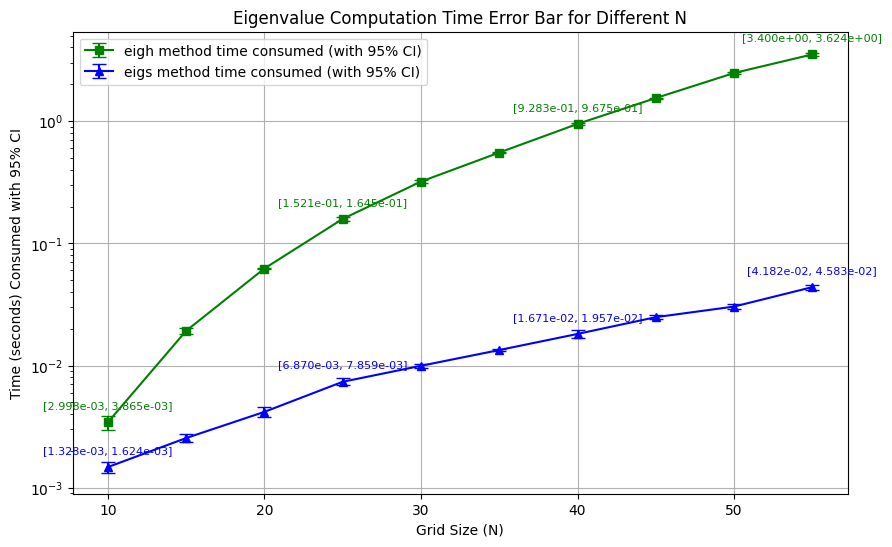

In [2]:
N_list = np.linspace(10, 55, 10, dtype=int)  # 10 grid sizes from 10 to 55
num_repeats = 5  # Number of repeats for each grid size

print("Running benchmark...")
times = speed_analysis.benchmark_set(N_list, num_repeats=num_repeats)

# Plot the results
speed_analysis.plot_results_set(times, path="./fig/speed_analysis.png")

## D) spectrum of eigenfrequencies depend on the size L

Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
{1: array([141.35428288, 141.25374045, 141.25374045, ...,   6.88337184,
         6.88337184,   4.35507895]), 2: array([70.67714144, 70.62687023, 70.62687023, ...,  3.44168592,
        3.44168592,  2.17753947]), 3: array([47.11809429, 47.08458015, 47.08458015, ...,  2.29445728,
        2.29445728,  1.45169298]), 4: array([35.33857072, 35.31343511, 35.31343511, ...,  1.72084296,
        1.72084296,  1.08876974]), 5: array([28.27085658, 28.25074809, 28.25074809, ...,  1.37667437,
        1.37667437,  0.87101579])}


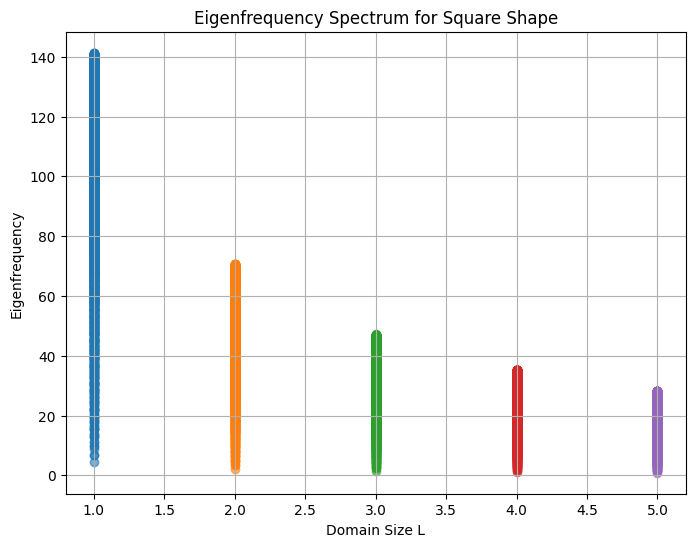

Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
{1: array([141.37927025, 141.35361555, 141.31087497, ...,   5.58897276,
         4.37668489,   3.44991954]), 2: array([70.68963512, 70.67680778, 70.65543748, ...,  2.79448638,
        2.18834245,  1.72495977]), 3: array([47.12642342, 47.11787185, 47.10362499, ...,  1.86299092,
        1.45889496,  1.14997318]), 4: array([35.34481756, 35.33840389, 35.32771874, ...,  1.39724319,
        1.09417122,  0.86247989]), 5: array([28.27585405, 28.27072311, 28.26217499, ...,  1.11779455,
        0.87533698,  0.68998391])}


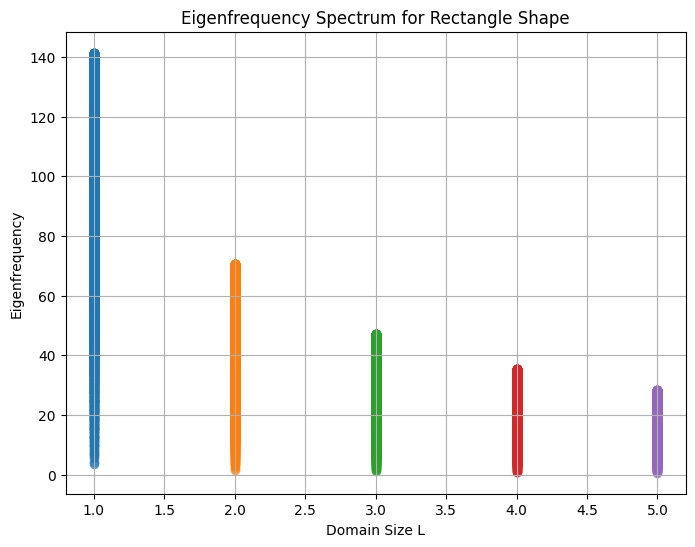

d:\code-repo\作业\sc_set3\zxx\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Using scipy.linalg.eigh() (for symmetric dense matrices)


d:\code-repo\作业\sc_set3\src\eigenmode\spectrum.py:40: RuntimeWarning: invalid value encountered in sqrt
  eigenfrequencies = np.sqrt(-eigenvalues)  # Compute eigenfrequencies


Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
Using scipy.linalg.eigh() (for symmetric dense matrices)
{1: array([141.34219577, 141.22069819, 141.22027744, ...,          nan,
                nan,          nan]), 2: array([70.67109788, 70.6103491 , 70.61013872, ...,         nan,
               nan,         nan]), 3: array([47.11406526, 47.07356606, 47.07342581, ...,         nan,
               nan,         nan]), 4: array([35.33554894, 35.30517455, 35.30506936, ...,         nan,
               nan,         nan]), 5: array([28.26843915, 28.24413964, 28.24405549, ...,         nan,
               nan,         nan])}


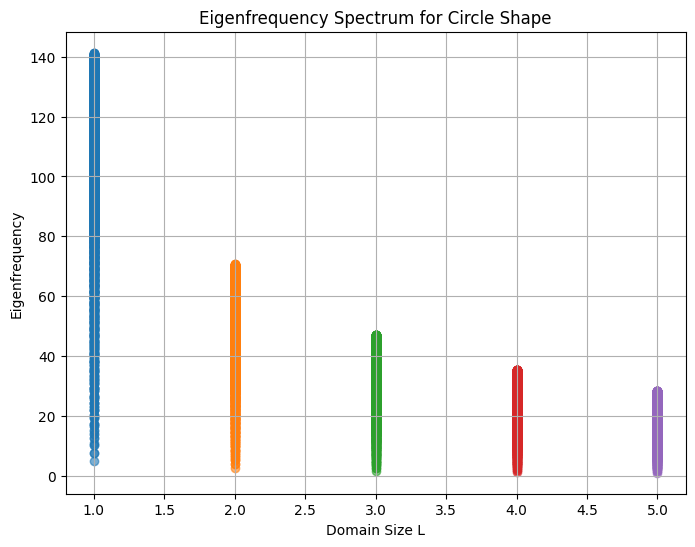

In [ ]:
L_values = [1, 2, 3, 4, 5]  # Different domain sizes
N = 50  # Grid size

# shape = "square"
spectrum_list = spectrum.compute_eigenfrequency_spectrum(L_values, N, "square", num_eigenvalues=10, method="eigh")
print(spectrum_list[5])
spectrum.plot_eigenfrequency_spectrum_by_shape(spectrum_list, "square")

# shape = "rectangle"
spectrum_list = spectrum.compute_eigenfrequency_spectrum(L_values, N, "rectangle", num_eigenvalues=10, method="eigh")
print(spectrum_list[5])
spectrum.plot_eigenfrequency_spectrum_by_shape(spectrum_list, "rectangle")

# shape = "circle"
spectrum_list = spectrum.compute_eigenfrequency_spectrum(L_values, N, "circle", num_eigenvalues=10, method="eigh")
print(spectrum_list[5])
spectrum.plot_eigenfrequency_spectrum_by_shape(spectrum_list, "circle")